In [1]:
%cd ..

/home/alberto/PycharmProjects/incomplete_multiview_clustering


# Tutorial: Block-wise missing data generation

## Prerequisites

We will need the following libraries installed: matplotlib

## Step 1: Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imvc.ampute import Amputer
from imvc.utils import DatasetUtils
from imvc.impute import get_observed_view_indicator

In [3]:
from tueplots import axes, bundles
plt.rcParams.update({**bundles.icml2022(), **axes.lines()})

## Step 2: Load the dataset

Let's create a random multi-view dataset with 1000 samples and 5 views.

In [4]:
RANDOM_STATE = 42
n_views = 5
n_samples = 1000
Xs = [pd.DataFrame(np.random.default_rng(RANDOM_STATE).random((n_samples, 10))) for i in range(n_views)]

## Step 3: Apply missing data mechanism (Amputation)

Using Amputer, we randomly introduce missing data to simulate a scenario where some modalities are missing. Here, 30% of the samples will be incomplete.

In [5]:
mechanism = "EDM"
transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)

We can visualize which modalities are missing using a binary color map, where black means observed and white means empty (missing).

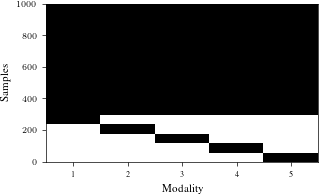

In [6]:
xlabel,ylabel = "Modality", "Samples"
observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
observed_view_indicator.columns = observed_view_indicator.columns + 1
plt.pcolor(observed_view_indicator, cmap="binary")
plt.xticks(np.arange(0.5, len(observed_view_indicator.columns), 1), observed_view_indicator.columns)
_ = plt.xlabel(xlabel), plt.ylabel(ylabel)

## Step 4: Visualize different amputation mechanisms 

We will show the four different amputation mechanisms: EDM, PM, MCAR and MNAR. 

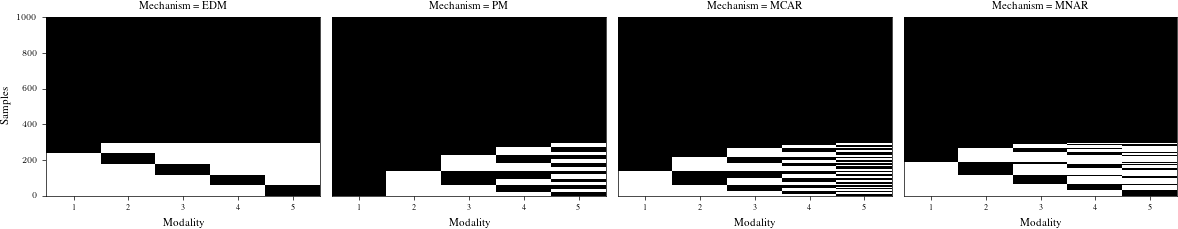

In [7]:
samples_dict = {}
fig,axs = plt.subplots(1,4, figsize= (12,2.5))
for idx, (ax, mechanism) in enumerate(zip(axs, ["EDM", "PM", "MCAR", "MNAR"])):
    transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)
    observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
    observed_view_indicator.columns = observed_view_indicator.columns + 1
    ax.pcolor(observed_view_indicator, cmap="binary")
    ax.set_title(f"Mechanism = {mechanism}")
    ax.set_xticks(np.arange(0.5, len(observed_view_indicator.columns), 1), observed_view_indicator.columns)
    ax.set_xlabel(xlabel), ax.set_ylabel(ylabel)
    if idx != 0:
        ax.get_yaxis().set_visible(False)
    samples_dict[mechanism] = DatasetUtils.get_summary(Xs=transformed_Xs)
plt.tight_layout()
plt.savefig("paper_figures/amputation.pdf")
plt.savefig("paper_figures/amputation.svg")

As shown in the below table, all samples have the same number of complete and incomplete samples. However, the amount of observed samples in each modality varies depending on the chosen missing pattern.

In [8]:
pd.DataFrame.from_dict(samples_dict, orient= "index")

,Complete samples,Incomplete samples,Observed samples in modalitiy,Missing samples in modalitiy,% Observed samples in modalitiy,% Missing samples in modalitiy
EDM,700,300,"[760, 760, 760, 760, 760]","[240, 240, 240, 240, 240]","[76, 76, 76, 76, 76]","[24, 24, 24, 24, 24]"
PM,700,300,"[1000, 861, 845, 858, 844]","[0, 139, 155, 142, 156]","[100, 86, 84, 86, 84]","[0, 14, 16, 14, 16]"
MCAR,700,300,"[861, 856, 838, 844, 858]","[139, 144, 162, 156, 142]","[86, 86, 84, 84, 86]","[14, 14, 16, 16, 14]"
MNAR,700,300,"[806, 804, 793, 800, 806]","[194, 196, 207, 200, 194]","[81, 80, 79, 80, 81]","[19, 20, 21, 20, 19]"


In [9]:
print(pd.DataFrame.from_dict(samples_dict, orient= "index").to_latex())

\begin{tabular}{lrrllll}
\toprule
 & Complete samples & Incomplete samples & Observed samples in modalitiy & Missing samples in modalitiy & % Observed samples in modalitiy & % Missing samples in modalitiy \\
\midrule
EDM & 700 & 300 & [760, 760, 760, 760, 760] & [240, 240, 240, 240, 240] & [76, 76, 76, 76, 76] & [24, 24, 24, 24, 24] \\
PM & 700 & 300 & [1000, 861, 845, 858, 844] & [0, 139, 155, 142, 156] & [100, 86, 84, 86, 84] & [0, 14, 16, 14, 16] \\
MCAR & 700 & 300 & [861, 856, 838, 844, 858] & [139, 144, 162, 156, 142] & [86, 86, 84, 84, 86] & [14, 14, 16, 16, 14] \\
MNAR & 700 & 300 & [806, 804, 793, 800, 806] & [194, 196, 207, 200, 194] & [81, 80, 79, 80, 81] & [19, 20, 21, 20, 19] \\
\bottomrule
\end{tabular}

